In [1]:
import geopandas as gpd
import contextily as cx
from pygbif import occurrences
import pandas as pd

  CLAB_ID CPC_CODE REG_CODE CLAB_TYPE ABS_ACCUR  \
0    TORN       NL     None        NP      <10m   
1   33245       ON     None        NP       <2m   
2    WATE       AB     None        NP       <2m   
3    FIVE       ON     None        NP       <2m   
4    QAUS       NU     None        NP     >100m   

                                       NAME_E  \
0   TORNGAT MOUNTAINS NATIONAL PARK OF CANADA   
1                   ROUGE NATIONAL URBAN PARK   
2      WATERTON LAKES NATIONAL PARK OF CANADA   
3  FATHOM FIVE NATIONAL MARINE PARK OF CANADA   
4          QAUSUITTUQ NATIONAL PARK OF CANADA   

                                      NAME_F CLAB_CAT  \
0  PARC NATIONAL DES MONTS-TORNGAT DU CANADA       PA   
1           PARC URBAIN NATIONAL DE LA ROUGE       PA   
2  PARC NATIONAL DES LACS-WATERTON DU CANADA       PA   
3  PARC MARIN NATIONAL DU CANADA FATHOM FIVE       PA   
4         PARC NATIONAL QAUSUITTUQ DU CANADA       PA   

                                            geometry  


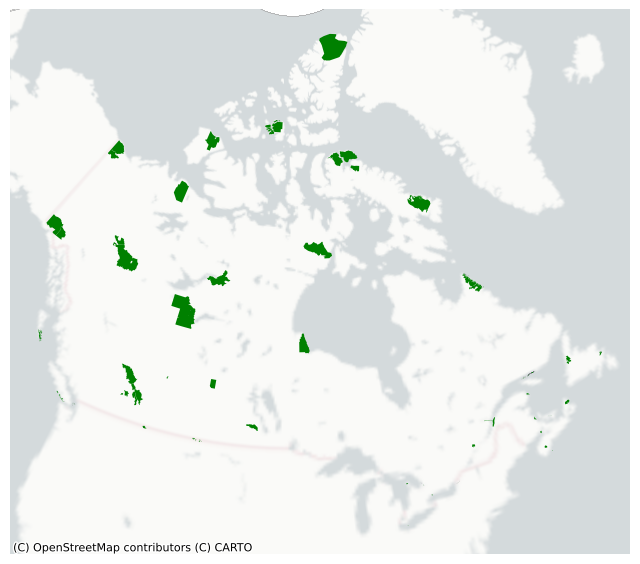

In [2]:
# National parks dataset

parks_gdf = gpd.read_file(r'data/parks.gpkg')

print(parks_gdf.head(5))

print(parks_gdf.crs)

ax = parks_gdf.plot(figsize=(8, 8), facecolor='green')
cx.add_basemap(ax, crs=parks_gdf.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax.set_axis_off()

In [3]:
# Canadian species at risk
sar_df = pd.read_csv(r'data/CAN-SAR_database.csv')

print(sar_df.head(5))

   rowID  speciesID                                        common_name  \
0      2        394  allegheny mountain dusky salamander appalachia...   
1      3        396  allegheny mountain dusky salamander carolinian...   
2      4        396  allegheny mountain dusky salamander carolinian...   
3      6        367                                  american chestnut   
4      7        318                                   american columbo   

                    species                doc_type sara_status  \
0  Desmognathus ochrophaeus  COSEWIC Status Reports  Threatened   
1  Desmognathus ochrophaeus  COSEWIC Status Reports  Endangered   
2  Desmognathus ochrophaeus     Recovery Strategies  Endangered   
3          Castanea dentata     Recovery Strategies  Endangered   
4     Frasera caroliniensis     Recovery Strategies  Endangered   

                                        doc_citation  \
0  COSEWIC. 2018. COSEWIC assessment and status r...   
1  COSEWIC. 2018. COSEWIC assessment and

In [4]:
print(parks_gdf['NAME_E'].sort_values())

14                      AULAVIK NATIONAL PARK OF CANADA
8                     AUYUITTUQ NATIONAL PARK OF CANADA
44                        BANFF NATIONAL PARK OF CANADA
37        CAPE BRETON HIGHLANDS NATIONAL PARK OF CANADA
26                   ELK ISLAND NATIONAL PARK OF CANADA
3            FATHOM FIVE NATIONAL MARINE PARK OF CANADA
11                     FORILLON NATIONAL PARK OF CANADA
15                        FUNDY NATIONAL PARK OF CANADA
42         GEORGIAN BAY ISLANDS NATIONAL PARK OF CANADA
41                      GLACIER NATIONAL PARK OF CANADA
43                   GRASSLANDS NATIONAL PARK OF CANADA
39                   GROS MORNE NATIONAL PARK OF CANADA
17         GULF ISLANDS NATIONAL PARK RESERVE OF CANADA
9          GWAII HAANAS NATIONAL PARK RESERVE OF CANADA
32                      IVVAVIK NATIONAL PARK OF CANADA
28                       JASPER NATIONAL PARK OF CANADA
23                   KEJIMKUJIK NATIONAL PARK OF CANADA
34                       KLUANE NATIONAL PARK OF

Total records downloaded: 300
Total records downloaded: 600
Total records downloaded: 900


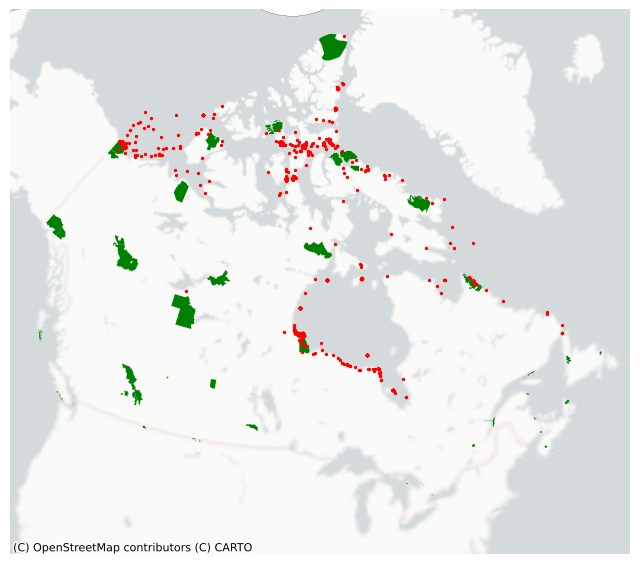

In [5]:
# Based on code from https://discourse.gbif.org/t/retrieving-inaturalist-observations-for-a-region-observers-with-pygbif/4565

# TARGET_SP = 'Salix turnorii' # Turnor's willow 
# TARGET_SP = 'Aneides vagrans' # wandering salamander
TARGET_SP = 'Ursus maritimus' # polar bear

results = []

offset = 0

while True:

    out = occurrences.search(scientificName=TARGET_SP,
                             country='CA',
                             hasCoordinate=True, 
                             hasGeospatialIssue=False, 
                             offset=offset
                            ) 
    
    if len(out['results']) == 0:
        break

    results.extend(out['results'])

    offset += len(results)

    print(f"Total records downloaded: {len(results)}")

lat_ls = [results[i]['decimalLatitude'] for i in range(len(results))]
lon_ls = [results[i]['decimalLongitude'] for i in range(len(results))]

occurences_gdf = (gpd.GeoDataFrame(geometry=gpd.points_from_xy(lon_ls, lat_ls), crs='EPSG:4326')
                  .to_crs(parks_gdf.crs))

ax = parks_gdf.plot(figsize=(8, 8), facecolor='green')
occurences_gdf.plot(ax=ax, color='red', markersize=2)
cx.add_basemap(ax, crs=parks_gdf.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax.set_axis_off()